In [39]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import numpy as np
import pickle
import matplotlib
from sklearn.metrics import confusion_matrix

np.set_printoptions(precision=3, suppress=True)

In [2]:
data_path = os.path.dirname(os.path.realpath('')) + '/Programming Assignment 1/data_prog2'
train_data_path = data_path + "/train_data"
test_data_path = data_path + "/test_data"
train_labels_path = data_path + "/labels/train_label.txt"
test_labels_path = data_path + "/labels/test_label.txt"

In [3]:
# train_data = 25112*784
num_train_data = len(os.listdir(train_data_path))
train_data = []
for filename in sorted(os.listdir(train_data_path)):
    image = mpimg.imread(os.path.join(train_data_path, filename))
    train_data.append(image.reshape(784).tolist())

In [4]:
# test_data = 4982*784
num_test_data = len(os.listdir(test_data_path))
test_data = []
for filename in sorted(os.listdir(test_data_path)):
    image = mpimg.imread(os.path.join(test_data_path, filename))
    test_data.append(image.reshape(784).tolist())

In [5]:
# normalize data
X_train = [[y / 255. for y in x] for x in train_data]
X_test = [[y / 255. for y in x] for x in test_data]

In [6]:
# onehot encode output to 5 categories
# Y_train = 25112*5
Y_train = []
with open(train_labels_path,'r') as f:
    for line in f.readlines():
        j = int(line[:-1]) - 1
        tmp = [0.] * 5
        tmp[j] = 1.
        Y_train.append(tmp)
    
# Y_test = 4982*5
Y_test = []
with open(test_labels_path,'r') as f:
    for line in f.readlines():
        j = int(line[:-1]) - 1
        tmp = [0.] * 5
        tmp[j] = 1.
        Y_test.append(tmp)

In [7]:
X_train = np.matrix(X_train)
X_test = np.matrix(X_test)
Y_train = np.matrix(Y_train)
Y_test = np.matrix(Y_test)

In [8]:
def sigmoid(x):
    # x = 64*N matrix
    return 1. / (1 + np.exp(-x))

In [9]:
def softmax_matrix(x):
    # x = 5*N matrix
    return np.exp(x) / np.sum(np.exp(x), axis = 0)

In [10]:
def compute_loss_matrix(Y_hat, Y):
    # Y, Y_hat = 5*N matrix
    return -1 / Y.shape[1] * np.sum(np.multiply(Y, np.log(Y_hat)))

In [46]:
# X -> |W1,b1| -> A1 -> |sigmoid| -> Z1 -> |W2,b2| -> A2 -> |softmax| -> Z2 = Y_hat
W1 = np.matrix(np.random.randn(784,64)) * 0.001
b1 = np.matrix(np.random.randn(64,1)) * 0.001
W2 = np.matrix(np.random.randn(64,5)) * 0.001
b2 = np.matrix(np.random.randn(5,1)) * 0.001

In [48]:
lr = 0.0001
X = X_train.T # 784*25112
Y = Y_train.T # 5*25112
for i in range(200):
    A1 = np.matmul(W1.T, X) + b1 # 64*25112
    Z1 = sigmoid(A1) # 64*25112
    
    A2 = np.matmul(W2.T, Z1) + b2 # 5*25112
    Y_hat = softmax_matrix(A2) # 5*25112

    loss = compute_loss_matrix(Y_hat, Y)
    
    dW2 = Z1 * (Y_hat-Y).T # 64*5 = (64*25112) * (25112*5)
    db2 = np.sum(Y_hat-Y, axis = 1) # 64*1
    
    dZ1 = W2 * (Y_hat-Y) # (64*5) * (5*25112)
    dA1 = np.multiply(dZ1, np.multiply(sigmoid(A1), 1-sigmoid(A1))) # 64*25112
    dW1 = X * dA1.T # (784*25112) * (25112*64)
    db1 = np.sum(dA1, axis = 1) # 64*1

    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1
    
#     if i % 100 == 0:
    print('Iter: {}\tloss: {}'.format(i, loss))

Iter: 0	loss: 1.5278494398119342
Iter: 1	loss: 1.5189582959504624
Iter: 2	loss: 1.5086841714171395
Iter: 3	loss: 1.4964351272413317
Iter: 4	loss: 1.4811032432699005
Iter: 5	loss: 1.4607977724428667
Iter: 6	loss: 1.434393519915286
Iter: 7	loss: 1.4045708107196284
Iter: 8	loss: 1.3724475206220934
Iter: 9	loss: 1.3380465178618555
Iter: 10	loss: 1.3020336356358175
Iter: 11	loss: 1.2651128335931807
Iter: 12	loss: 1.2274938534568909
Iter: 13	loss: 1.1885725426601637
Iter: 14	loss: 1.1470986708783482
Iter: 15	loss: 1.101698987014498
Iter: 16	loss: 1.0517011531670368
Iter: 17	loss: 0.9987093118697026
Iter: 18	loss: 0.9476968635382808
Iter: 19	loss: 0.9026339138142514
Iter: 20	loss: 0.8634299938915213
Iter: 21	loss: 0.8286535665640183
Iter: 22	loss: 0.7970066350963702
Iter: 23	loss: 0.7675850687288918
Iter: 24	loss: 0.7398185025375028
Iter: 25	loss: 0.7133678250943035
Iter: 26	loss: 0.6880444725903732
Iter: 27	loss: 0.6637564657194855
Iter: 28	loss: 0.6404613166337291
Iter: 29	loss: 0.618128620

In [49]:
W_1 = sigmoid(W1) * W2[:,0]
W_2 = sigmoid(W1) * W2[:,1]
W_3 = sigmoid(W1) * W2[:,2]
W_4 = sigmoid(W1) * W2[:,3]
W_5 = sigmoid(W1) * W2[:,4]

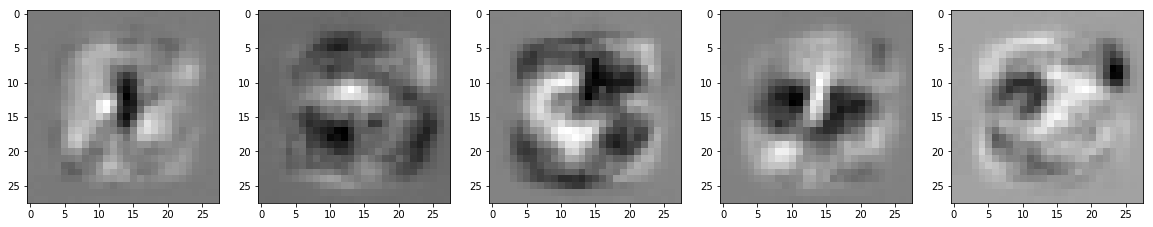

In [50]:
plt.figure(figsize=(20,10))
plt.subplot(1, 5, 1)
plt.imshow(W_1.reshape(28,28), cmap = 'binary')
plt.subplot(1, 5, 2)
plt.imshow(W_2.reshape(28,28), cmap = 'binary')
plt.subplot(1, 5, 3)
plt.imshow(W_3.reshape(28,28), cmap = 'binary')
plt.subplot(1, 5, 4)
plt.imshow(W_4.reshape(28,28), cmap = 'binary')
plt.subplot(1, 5, 5)
plt.imshow(W_5.reshape(28,28), cmap = 'binary')
# plt.colorbar()
plt.show()

In [38]:
i = 0
predicts = []
answers = []
for x,y in zip(X_test, Y_test):
#    print(y)
    a1 = np.matmul(W1.T, x.T) + b1 # 64*25112
    z1 = sigmoid(a1) # 64*25112
    
    a2 = np.matmul(W2.T, z1) + b2 # 5*25112
    y_hat = softmax_matrix(a2) # 5*25112
    
    y_hat = y_hat.tolist()
    predict = y_hat.index(max(y_hat)) + 1
#    print(predict+1)
    predicts.append(predict)

    y = y.reshape(5,1).tolist()
    answer = y.index(max(y)) + 1
#    print(answer+1)
    answers.append(answer)

In [40]:
confusion_matrix(answers, predicts)

array([[1053,    6,    3,    0,    2],
       [   3,  954,   17,    9,    7],
       [   1,   13,  992,    3,   21],
       [   8,    7,    3,  964,    1],
       [   2,    6,   33,   10,  864]])

In [42]:
class_error = [0]*5
class_total = [0]*5

In [43]:
for p,a in zip(predicts, answers):
    class_total[a-1] += 1
    if p != a:
        class_error[a-1] += 1

In [44]:
print(class_error)

[11, 36, 38, 19, 51]


In [45]:
print(class_total)

[1064, 990, 1030, 983, 915]
